In [6]:
import sys
sys.path.append("..")
from library import *

In [11]:
radii = np.array([0.2, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05])

M = 4
tau = 3.5
psi0 = np.ones(4) * 0.5

energies = np.zeros(shape=(len(radii), 2))

for i, radius in enumerate(radii):
    h2qc = H2QCircuit(m=M, tau=tau, trot_reps=10)
    h2qc.run_simulation(num_shots=1)
    qc_state = h2qc.final_state
    qc_state = normalize(qc_state[::2 ** (M * 2)])
    qc_energy = get_energy(qc_state, ham)
    energies[i, 1] = qc_energy
    
    ham = h2qc.get_hamilt_op(n=2, radius=radius).to_matrix()
    gs_energy, gs_state = get_ground_eigh(ham)
    energies[i, 0] = gs_energy
    
    print(f"Simulation {i+1} for radius={radius:.2f} done!")
    

Simulation 1 for radius=0.20 done!
Simulation 2 for radius=0.25 done!
Simulation 3 for radius=0.30 done!
Simulation 4 for radius=0.35 done!
Simulation 5 for radius=0.40 done!
Simulation 6 for radius=0.45 done!
Simulation 7 for radius=0.50 done!
Simulation 8 for radius=0.55 done!
Simulation 9 for radius=0.65 done!
Simulation 10 for radius=0.75 done!
Simulation 11 for radius=0.85 done!
Simulation 12 for radius=0.95 done!
Simulation 13 for radius=1.05 done!


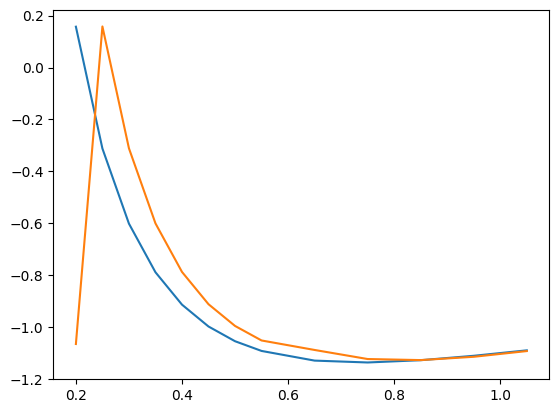

In [12]:
plt.plot(radii, energies[:, 0])
plt.plot(radii, energies[:, 1])